       System              Model       RMSE  R2 Score
0  Fixed-Time  Linear Regression  20.717399  0.997537
1  Fixed-Time   Ridge Regression  20.737959  0.997532
2  Fixed-Time   Lasso Regression  20.713999  0.997538
3  Fixed-Time      Decision Tree  27.555720  0.995643
4  Fixed-Time                KNN  34.781224  0.993058
5  Fixed-Time      Random Forest  22.319861  0.997141
6  Fixed-Time  Gradient Boosting  21.142174  0.997435
0    Adaptive  Linear Regression  19.645761  0.996570
1    Adaptive   Ridge Regression  19.664550  0.996563
2    Adaptive   Lasso Regression  19.643333  0.996571
3    Adaptive      Decision Tree  29.627920  0.992199
4    Adaptive                KNN  33.569847  0.989985
5    Adaptive      Random Forest  21.006410  0.996078
6    Adaptive  Gradient Boosting  20.246749  0.996357


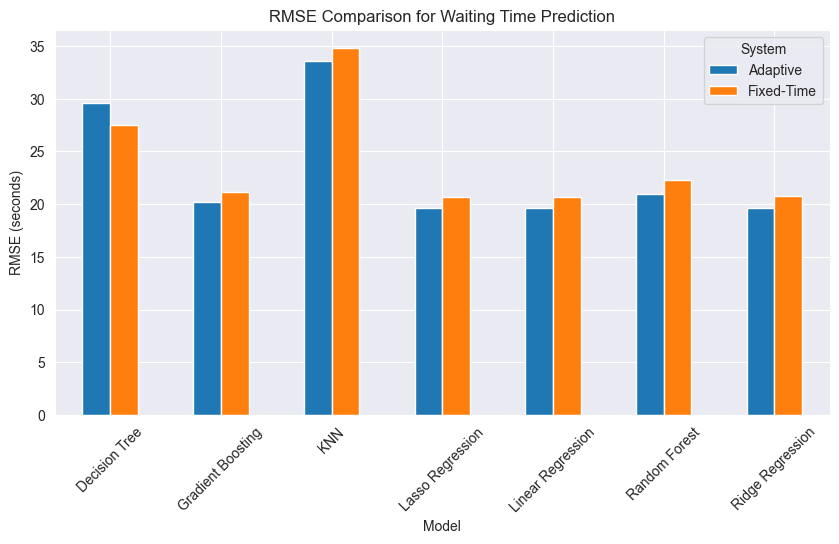

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")

fixed["system"] = "Fixed-Time"
adaptive["system"] = "Adaptive"

target = "waiting_time"
features = ["route_length", "depart_time", "duration", "time_loss"]


def preprocess(df):
    X = df[features]
    y = df[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

def train_and_evaluate(df, system_name):
    X, y = preprocess(df)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.01),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "KNN": KNeighborsRegressor(n_neighbors=5),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }
    
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        results.append({
            "System": system_name,
            "Model": name,
            "RMSE": rmse,
            "R2 Score": r2
        })

    return pd.DataFrame(results)

results_fixed = train_and_evaluate(fixed, "Fixed-Time")
results_adaptive = train_and_evaluate(adaptive, "Adaptive")

results = pd.concat([results_fixed, results_adaptive])
print(results)


results.pivot(index="Model", columns="System", values="RMSE").plot(
    kind="bar", figsize=(10,5)
)
plt.title("RMSE Comparison for Waiting Time Prediction")
plt.ylabel("RMSE (seconds)")
plt.xticks(rotation=45)
plt.show()




### Linear Regression Evaluation 

Linear Regression Performance:
Train RMSE: 19.292, R2: 0.998
Test  RMSE: 20.717, R2: 0.998


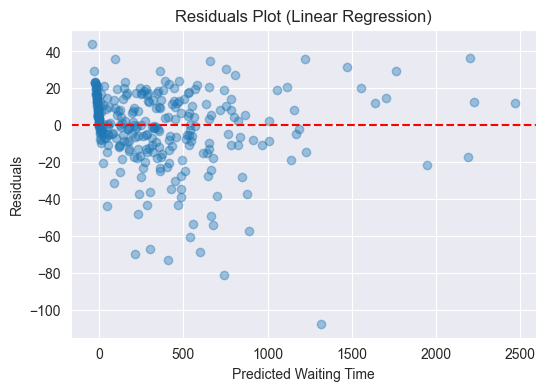

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load dataset
fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")

target = "waiting_time"
features = ["route_length", "depart_time", "duration", "time_loss"]

# Prepare X and y
X = fixed[features]
y = fixed[target]

# Optional: scale features (not mandatory for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# RMSE & R2
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Performance:")
print(f"Train RMSE: {lr_train_rmse:.3f}, R2: {lr_train_r2:.3f}")
print(f"Test  RMSE: {lr_test_rmse:.3f}, R2: {lr_test_r2:.3f}")

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
plt.scatter(y_test_pred, residuals, alpha=0.4)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted Waiting Time")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Linear Regression)")
plt.show()


### Gradient Boosting Evaluation

Fixed-Time - Gradient Boosting Performance:
Train RMSE: 13.675, R2: 0.999
Test  RMSE: 21.142, R2: 0.997


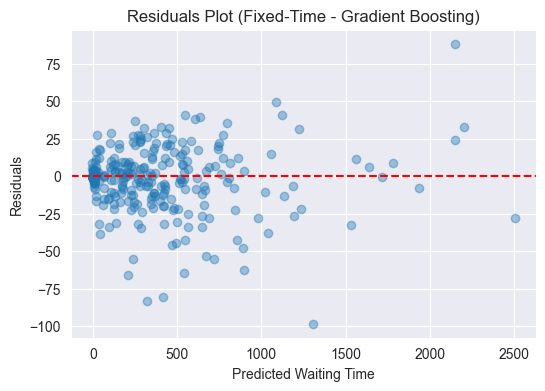

Adaptive - Gradient Boosting Performance:
Train RMSE: 11.913, R2: 0.999
Test  RMSE: 20.247, R2: 0.996


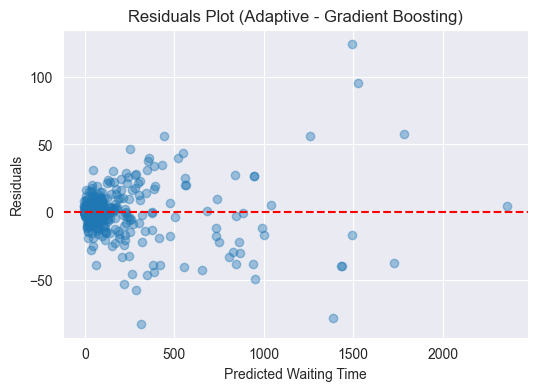

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Load dataset
fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")

target = "waiting_time"
features = ["route_length", "depart_time", "duration", "time_loss"]

def train_gradient_boosting(df, system_name):
    # Prepare data
    X = df[features]
    y = df[target]
    
    # Optional scaling (not mandatory for tree-based models)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    # Train Gradient Boosting
    gb = GradientBoostingRegressor(random_state=42)
    gb.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = gb.predict(X_train)
    y_test_pred = gb.predict(X_test)
    
    # Metrics
    gb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    gb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    gb_train_r2 = r2_score(y_train, y_train_pred)
    gb_test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"{system_name} - Gradient Boosting Performance:")
    print(f"Train RMSE: {gb_train_rmse:.3f}, R2: {gb_train_r2:.3f}")
    print(f"Test  RMSE: {gb_test_rmse:.3f}, R2: {gb_test_r2:.3f}")
    
    # Residual plot
    residuals = y_test - y_test_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_test_pred, residuals, alpha=0.4)
    plt.axhline(0, linestyle="--", color="red")
    plt.xlabel("Predicted Waiting Time")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot ({system_name} - Gradient Boosting)")
    plt.show()
    
    return gb, X_train, X_test, y_train, y_test, gb_train_rmse, gb_test_rmse, gb_train_r2, gb_test_r2

# Run for Fixed-Time
gb_fixed, X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed, \
gb_fixed_train_rmse, gb_fixed_test_rmse, gb_fixed_train_r2, gb_fixed_test_r2  = train_gradient_boosting(fixed, "Fixed-Time")

# Run for Adaptive
gb_adaptive, X_train_adaptive, X_test_adaptive, y_train_adaptive, y_test_adaptive, gb_adaptive_train_rmse, gb_adaptive_test_rmse, gb_adaptive_train_r2, gb_adaptive_test_r2 = train_gradient_boosting(adaptive, "Adaptive")



In [38]:
rmse_gb_df = pd.DataFrame({
    "System": ["Fixed-Time", "Adaptive"],
    "Model": ["Gradient Boosting", "Gradient Boosting"],
    "Train RMSE": [gb_fixed_train_rmse, gb_adaptive_train_rmse],
    "Test RMSE":  [gb_fixed_test_rmse,  gb_adaptive_test_rmse]
})

rmse_gb_df


,System,Model,Train RMSE,Test RMSE
0,Fixed-Time,Gradient Boosting,13.675111,21.142174
1,Adaptive,Gradient Boosting,11.912820,20.246749


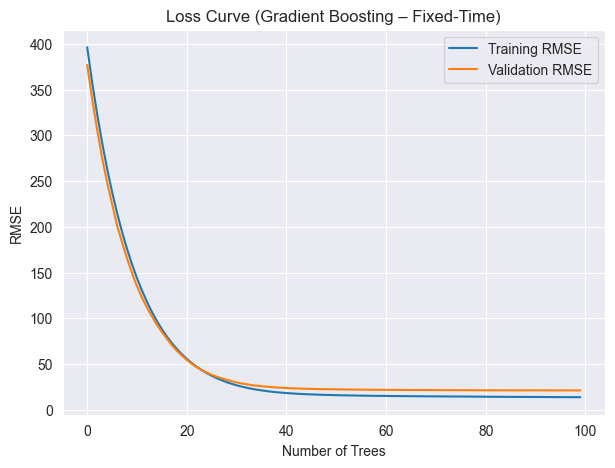

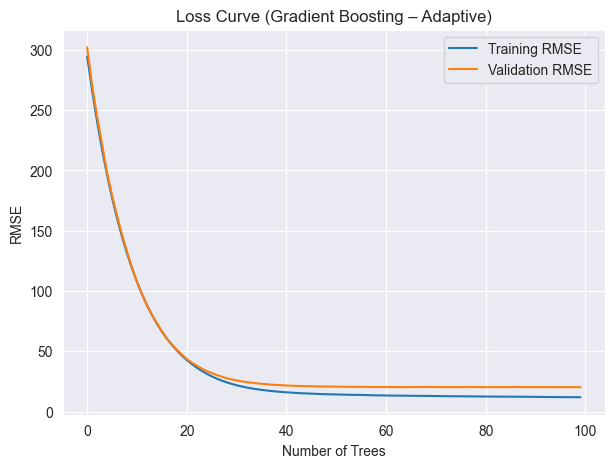

In [20]:
def plot_gb_loss_curve(gb, X_train, y_train, X_test, y_test, system_name):
    gb_train_rmse = []
    gb_test_rmse = []

    # staged_predict gives predictions after each boosting stage
    for y_train_pred, y_test_pred in zip(
        gb.staged_predict(X_train),
        gb.staged_predict(X_test)
    ):
        gb_train_rmse.append(
            np.sqrt(mean_squared_error(y_train, y_train_pred))
        )
        gb_test_rmse.append(
            np.sqrt(mean_squared_error(y_test, y_test_pred))
        )

    plt.figure(figsize=(7,5))
    plt.plot(gb_train_rmse, label="Training RMSE")
    plt.plot(gb_test_rmse, label="Validation RMSE")
    plt.xlabel("Number of Trees")
    plt.ylabel("RMSE")
    plt.title(f"Loss Curve (Gradient Boosting – {system_name})")
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Loss curve for Fixed-Time
plot_gb_loss_curve(
    gb_fixed,
    X_train_fixed,
    y_train_fixed,
    X_test_fixed,
    y_test_fixed,
    "Fixed-Time"
)

# Loss curve for Adaptive
plot_gb_loss_curve(
    gb_adaptive,
    X_train_adaptive,
    y_train_adaptive,
    X_test_adaptive,
    y_test_adaptive,
    "Adaptive"
)
    


### Decision Tree Evaluation 

Decision Tree Performance:
Train RMSE: 0.000, R2: 1.000
Test  RMSE: 27.578, R2: 0.996


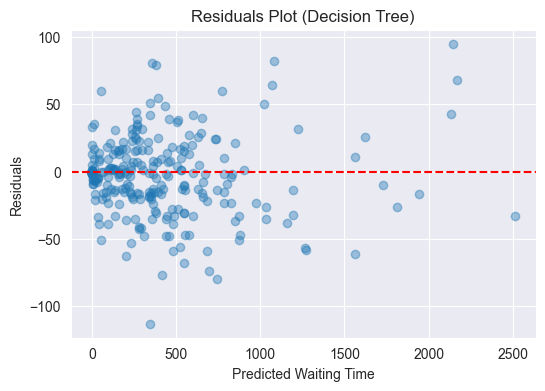

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Load datasets
fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")

# Choose system to test
df = fixed  # change to adaptive to test adaptive system

# Features and target
features = ["route_length", "depart_time", "duration", "time_loss"]
target = "waiting_time"

X = df[features]
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
dt_train_r2 = r2_score(y_train, y_train_pred)

dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
dt_test_r2 = r2_score(y_test, y_test_pred)

print("Decision Tree Performance:")
print(f"Train RMSE: {dt_train_rmse:.3f}, R2: {dt_train_r2:.3f}")
print(f"Test  RMSE: {dt_test_rmse:.3f}, R2: {dt_test_r2:.3f}")

# Residual plot for test set
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
plt.scatter(y_test_pred, residuals, alpha=0.4)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted Waiting Time")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Decision Tree)")
plt.show()


### Random Forest Evaluation 

Random Forest Performance (Fixed-Time):
Train RMSE: 8.868, R2: 1.000
Test  RMSE: 22.339, R2: 0.997


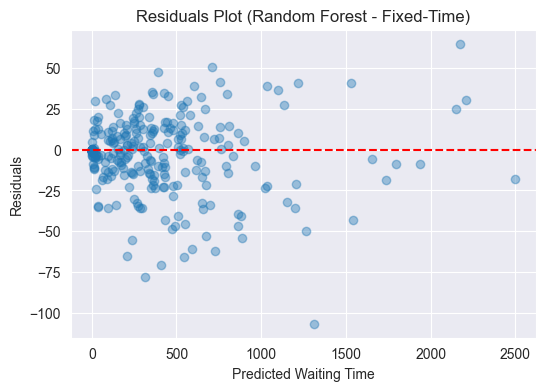

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")

# Example: Fixed-Time system
df = fixed.copy()

features = ["route_length", "depart_time", "duration", "time_loss"]
target = "waiting_time"

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_train_r2 = r2_score(y_train, y_train_pred)

rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Performance (Fixed-Time):")
print(f"Train RMSE: {rf_train_rmse:.3f}, R2: {rf_train_r2:.3f}")
print(f"Test  RMSE: {rf_test_rmse:.3f}, R2: {rf_test_r2:.3f}")


import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred, residuals, alpha=0.4)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted Waiting Time")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Random Forest - Fixed-Time)")
plt.show()


In [41]:
rmse_df = pd.DataFrame([
    ["Overall", "Linear Regression", lr_train_rmse, lr_test_rmse, lr_train_r2, lr_test_r2],
    ["Overall", "Decision Tree", dt_train_rmse, dt_test_rmse, dt_train_r2, dt_test_r2],
    ["Overall", "Random Forest", rf_train_rmse, rf_test_rmse, rf_train_r2, rf_test_r2],
    
    ["Fixed-Time", "Gradient Boosting", gb_fixed_train_rmse, gb_fixed_test_rmse, gb_fixed_train_r2, gb_fixed_test_r2 ],
    ["Adaptive",   "Gradient Boosting", gb_adaptive_train_rmse, gb_adaptive_test_rmse, gb_adaptive_train_r2, gb_adaptive_test_r2],
], columns=["System", "Model", "Train RMSE", "Test RMSE", "Train R2", "Test R2"])

rmse_df


,System,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Overall,Linear Regression,19.292263,20.717399,0.998068,0.997537
1,Overall,Decision Tree,0.000000,27.578226,1.000000,0.995636
2,Overall,Random Forest,8.867589,22.338987,0.999592,0.997136
3,Fixed-Time,Gradient Boosting,13.675111,21.142174,0.999029,0.997435
4,Adaptive,Gradient Boosting,11.912820,20.246749,0.998666,0.996357
